In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import oat
from typing import Optional
from jax import numpy as jnp, typing, jit
from functools import partial
from itertools import product
import pandas as pd
import matplotlib.pyplot as plt

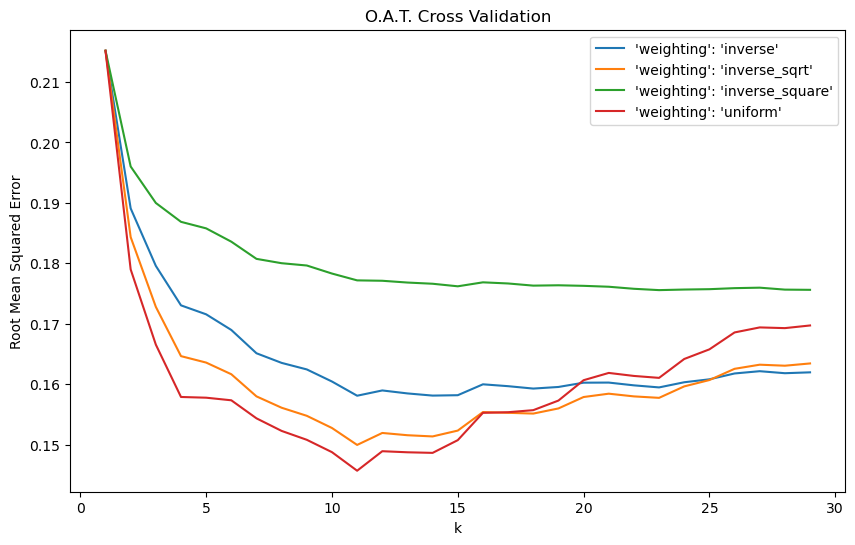

In [3]:
classical_train_data = jnp.load("../../data/classical_distance_matrix.npz")
output = oat.plot_oat_cross_validate(
    classical_train_data["train_distance_matrix"],
    classical_train_data["train_labels"],

)

In [10]:

gw_data = jnp.load("../../covhalo/results/halos/gw/gw_kernel_mat.npy")
particle_a = jnp.load("../../covhalo/results/halos/gw/particle_a.npy", allow_pickle=True)

In [82]:
import pathlib
results_dir = pathlib.Path("../../covhalo/results/halos/gw")
eps = [1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2]
kmat = jnp.load(str(results_dir / "gw_kernel_mat.npy"), allow_pickle=True)
points = jnp.load((results_dir / "particle_a.npy"), allow_pickle=True).item()
root = "./halos.pkl"

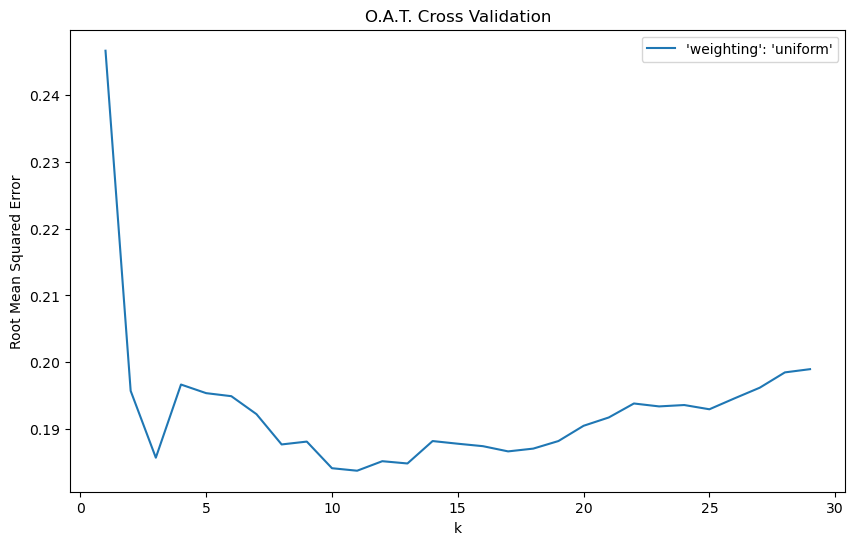

In [81]:
output = oat.plot_oat_cross_validate(
    kmat[5],
    classical_train_data["train_labels"],
    params={
        "k": jnp.arange(1, 30),
        "weighting": ["uniform"]
    }

)

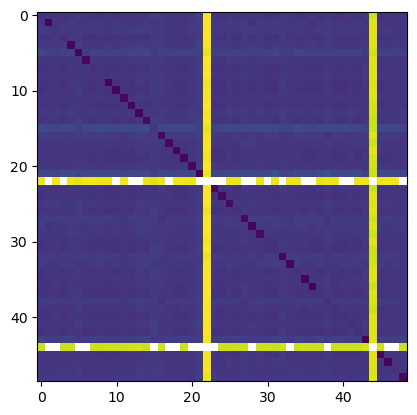

In [89]:
# plt.imshow(jnp.delete(jnp.delete(kmat, 22, axis=1), 22, axis=2)[0])
def drop_rowcol(mat, index):
    return jnp.delete(jnp.delete(mat, index, axis=-1), index, axis=-2)
plt.imshow(
    
    jnp.log(kmat[0])
)